In [84]:
from IPython.display import display, Latex
import sympy
from sympy.core.symbol import symbols, Symbol
from sympy.printing import latex, pprint
from sympy import log, exp, oo, integrate, Function, lambdify, nsolve, Pow, S, Derivative
from sympy import simplify, collect, expand, factor, apart, cancel 
from sympy import solve, pi, sqrt, series
from sympy.solvers.ode import dsolve
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter
from scipy.optimize import curve_fit, root_scalar, root
from math import pow

In [67]:
Ey = symbols('E_y' ,real=True, positive=True)
Vg = symbols('V_g' ,real=True)
r = symbols('r' ,real=True, positive=True)
R = symbols('R' ,real=True, positive=True)
theta = symbols('theta')
t = symbols('t' ,real=True, positive=True)
w = symbols('w' ,real=True, positive=True)
ze = symbols('z_e' ,real=True, positive=True)
L = symbols('L' ,real=True, positive=True)
e0 = symbols('e_0' ,real=True, positive=True)
e0r = symbols('e_{0r}' ,real=True, positive=True)
x = symbols('x' ,real=True, positive=True)
C = symbols('C' ,real=True, positive=True)
eps0 = symbols('epsilon_0' ,real=True, positive=True)
nu = symbols('nu')

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The below equations are from Frequency Tuning of Graphene Nanoelectromechanical Resonators via Electrostatic Gating, whcih references 
from [25] Schomburg, W.K. Introduction to Microsystem Design; Springer: New York, NY, USA, 2011. and 
[19] Electrically tunable single- and few-layer MoS2 nanoelectromechanical systems with broad dynamic range. In the [supplementary notes](https://www.science.org/doi/suppl/10.1126/sciadv.aao6653/suppl_file/aao6653_sm.pdf) of the latter, it offers equation S6, which also cites Intro to Microsystem Design. I don't see where the third term comes from. 
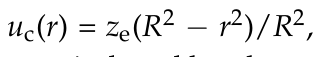
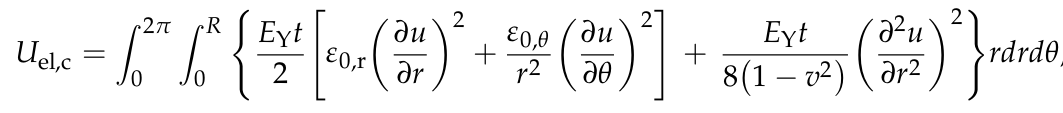
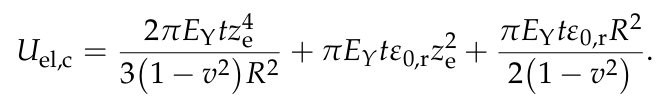



In [6]:
u = Function('u')(r)
u


u(r)

In [33]:
u = ze*(R**2-r**2)/R**2
dudr = u.diff(r)
dudr2 = dudr.diff(r)
u.diff(theta)
dudr
dudr2

0

-2*r*z_e/R**2

-2*z_e/R**2

In [38]:
integrand = Ey*t*(e0r*dudr**2/2 + dudr2**2/(8*(1-nu**2)))
integrand*r

E_y*r*t*(2*e_{0r}*r**2*z_e**2/R**4 + 4*z_e**2/(R**4*(8 - 8*nu**2)))

In [40]:
integrate(1, (theta, 0, 2*pi))
ans = integrate(integrand*r, (r, 0, R))
ans
simplify(ans)

2*pi

-E_y*R**2*t*z_e**2/(4*R**4*nu**2 - 4*R**4) + E_y*e_{0r}*t*z_e**2/2

E_y*t*z_e**2*(2*R**2*e_{0r}*(nu**2 - 1) - 1)/(4*R**2*(nu**2 - 1))

In [48]:
hand_integrand = ((Ey*t/2)*(e0r*4*r**2*ze**2/R**4) + Ey*t*4*ze**2/(8*(1-nu**2)*R**4))*r
hand_integrand
simplify(integrand*r-hand_integrand)

r*(2*E_y*e_{0r}*r**2*t*z_e**2/R**4 + 4*E_y*t*z_e**2/(R**4*(8 - 8*nu**2)))

0

From [85] S. Timoshenko, Theory of Plates and Shells. New York: McGraw-Hill, 1959.
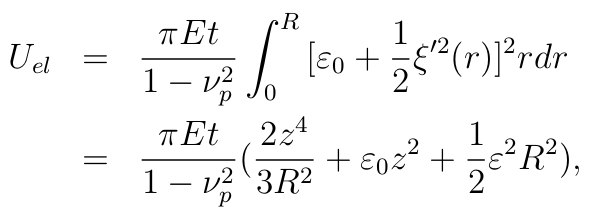



In [50]:
hand_ans = 8*pi*Ey*t*ze**2*(e0r/8 + 1/(16*(1-nu**2)*R**2))
simplify(2*pi*ans - hand_ans) 

0

In [51]:
ans*2*pi

pi*(-2*E_y*R**2*t*z_e**2/(4*R**4*nu**2 - 4*R**4) + E_y*e_{0r}*t*z_e**2)

### evaluate eq 45 from Microsystem, compare to (S7) in Elec Tun. SM 

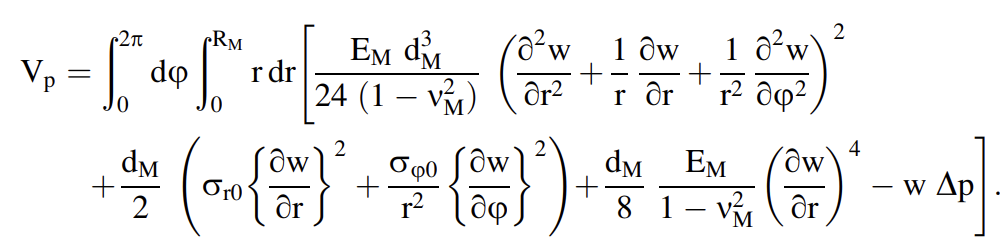

In [68]:
integrand_t1 = (Ey*t**3 / (24*(1-nu**2))) * (dudr2 + dudr/r)**2
integrand_t2 = (t/2)*e0r*dudr**2
integrand_t3 = (t*Ey/(8**1-nu**2))*dudr**4
integrand_t1
integrand_t2
integrand_t3
integrand = integrand_t1 + integrand_t2 + integrand_t3

16*E_y*t**3*z_e**2/(R**4*(24 - 24*nu**2))

2*e_{0r}*r**2*t*z_e**2/R**4

16*E_y*r**4*t*z_e**4/(R**8*(8 - nu**2))

In [74]:
ans = 2*pi*integrate(integrand*r, (r, 0, R))
simplify(ans)
simplify(collect(expand(ans), ze))
expand(ans)

-pi*t*z_e**2*(2*E_y*t**2*(nu**2 - 8) + 16*E_y*z_e**2*(nu**2 - 1) - 3*R**2*e_{0r}*(nu**2 - 8)*(nu**2 - 1))/(3*R**2*(nu**2 - 8)*(nu**2 - 1))

pi*t*z_e**2*(-16*E_y*z_e**2*(nu**2 - 1) - (nu**2 - 8)*(2*E_y*t**2 - 3*R**2*e_{0r}*(nu**2 - 1)))/(3*R**2*(nu**2 - 8)*(nu**2 - 1))

-16*pi*E_y*R**6*t*z_e**4/(3*R**8*nu**2 - 24*R**8) - 2*pi*E_y*R**2*t**3*z_e**2/(3*R**4*nu**2 - 3*R**4) + pi*e_{0r}*t*z_e**2

In [70]:
S7 = (pi* Ey*t/(1-nu**2))*(2*ze**4/(3*R**2) + (1-nu**2)*e0r*ze**2 + e0r*R**2/2)
S7

pi*E_y*t*(R**2*e_{0r}/2 + e_{0r}*z_e**2*(1 - nu**2) + 2*z_e**4/(3*R**2))/(1 - nu**2)

In [75]:
subs = {Ey: 1e12 ,  'nu':.19, t: 10e-9, R: 3e-6, Vg : 1.0 ,ze: 10e-9 ,e0r : .0001}
S7.subs(subs)
ans.subs(subs)

4.66864176512855e-12*pi

1.51258146134587e-17*pi

### check where the units get messed up: 
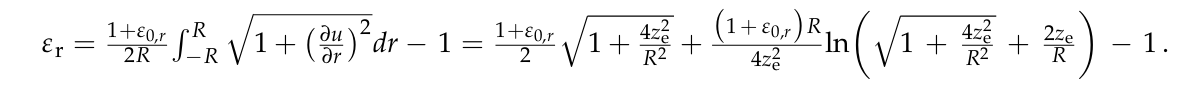

In [79]:
integrate(sqrt(1+dudr**2), (r, -R, R))

R**2*asinh(2*z_e/R)/(2*z_e) + sqrt(R**4 + 4*R**2*z_e**2)/R

In [80]:
dudr**2

4*r**2*z_e**2/R**4

In [90]:
expr = sqrt(1 + (4 * ze**2 * r**2) / R**4)

# Perform the series expansion around z_e = 0 up to the second-order term
taylor_series = series(expr, ze, 0, 3).removeO()

taylor_series
integrate(taylor_series, (r, -R, R))

1 + 2*r**2*z_e**2/R**4

2*R + 4*z_e**2/(3*R)